In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
nyc = gpd.read_file('data2\zip_boundary')
nyc.head()

ZIPCODE   PO_NAME  POPULATION          AREA STATE  COUNTY CTY_FIPS  OID_  \
0   11436   Jamaica     18681.0  2.269930e+07    NY  Queens      081   352   
1   11213  Brooklyn     62426.0  2.963100e+07    NY   Kings      047   277   
2   11212  Brooklyn     83866.0  4.197210e+07    NY   Kings      047   276   
3   11225  Brooklyn     56527.0  2.369863e+07    NY   Kings      047   289   
4   11218  Brooklyn     72280.0  3.686880e+07    NY   Kings      047   282   

                       Utility  EVs_on_the zipcode_1  \
0  Consolidated Edison Company           3     11436   
1  Consolidated Edison Company           8     11213   
2  Consolidated Edison Company          10     11212   
3  Consolidated Edison Company           9     11225   
4  Consolidated Edison Company          30     11218   

                                            geometry  
0  POLYGON ((-73.80584985907625 40.68291758397288...  
1  POLYGON ((-73.93739905594262 40.67973784157051...  
2  POLYGON ((-73.90294273843013 40.67084802767899...  
3  POLYGON ((-73.95797459101955 40.67066520879579...  
4  POLYGON ((-73.9720825295332 40.65060483266581,...

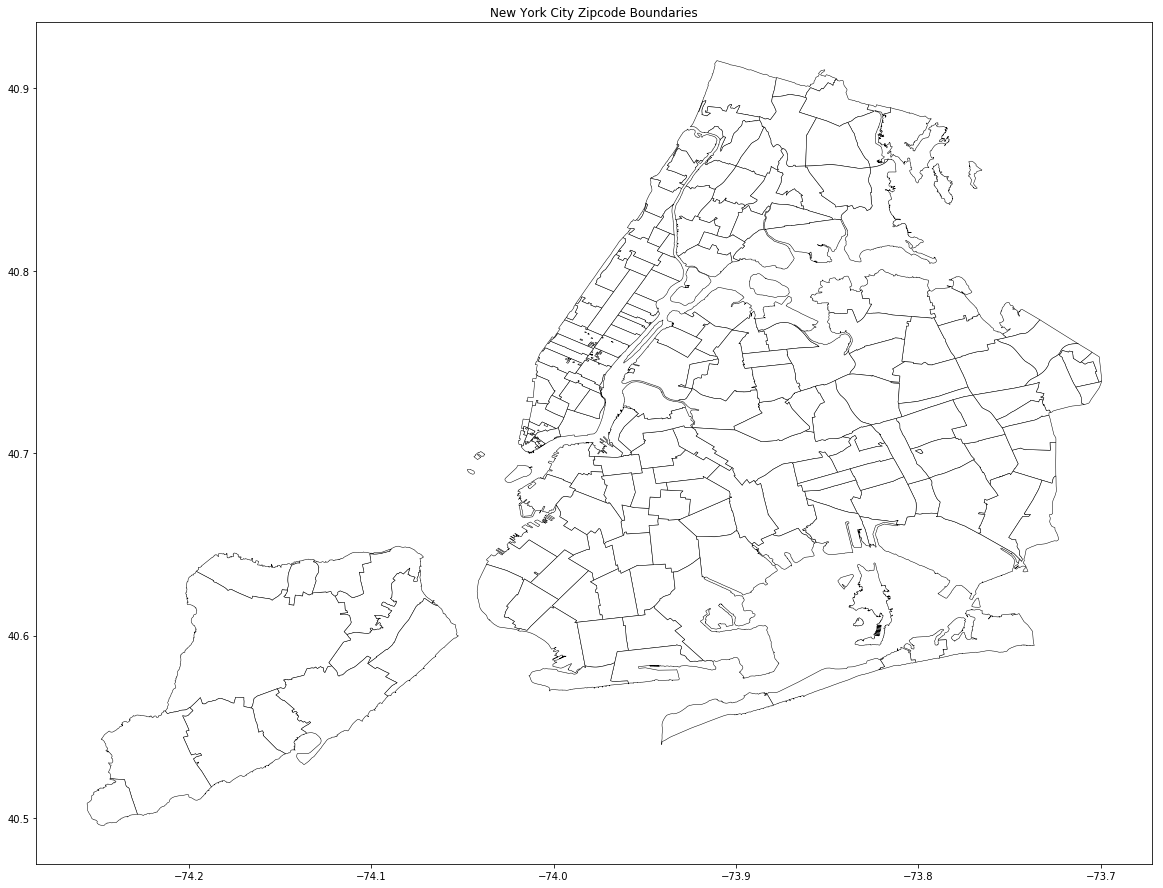

In [7]:
ax = nyc.plot(color='white',edgecolor='black',linewidth=0.5,figsize=(20,20));
ax.set_title('New York City Zipcode Boundaries');

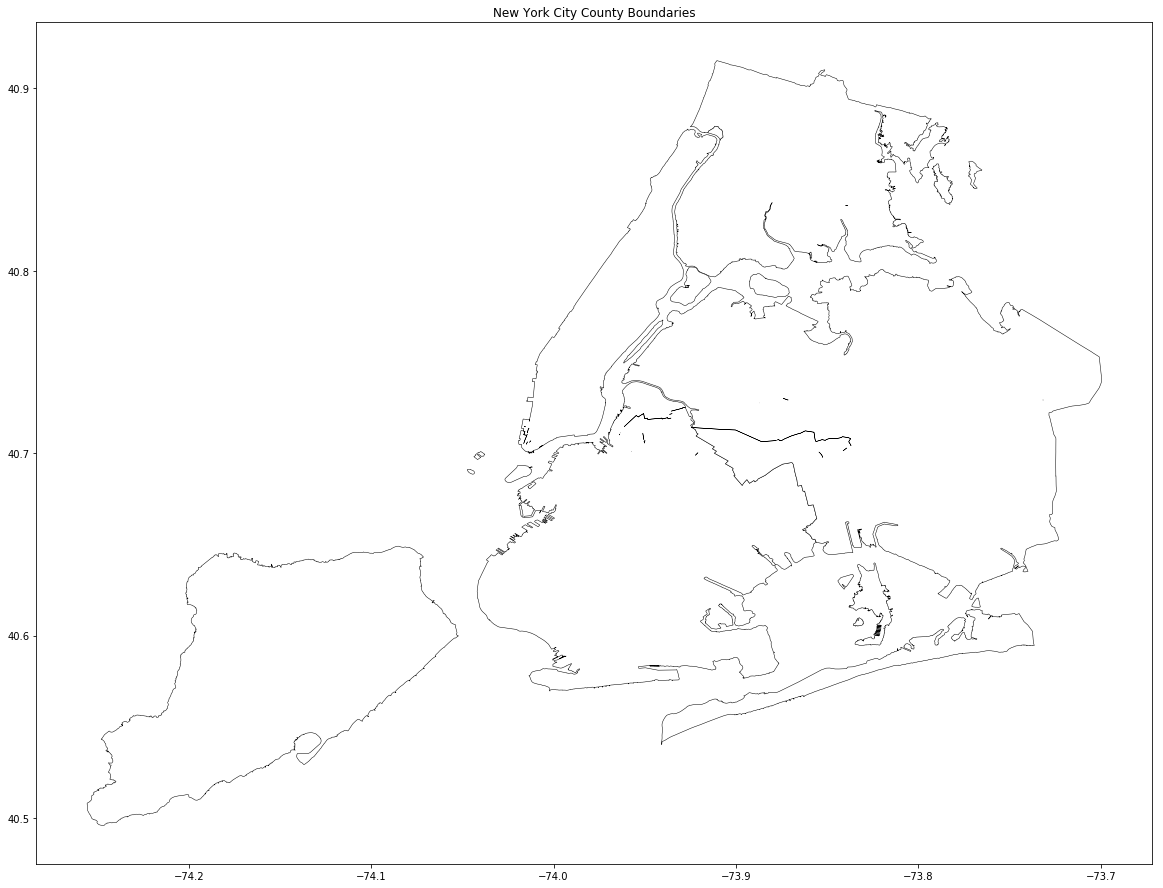

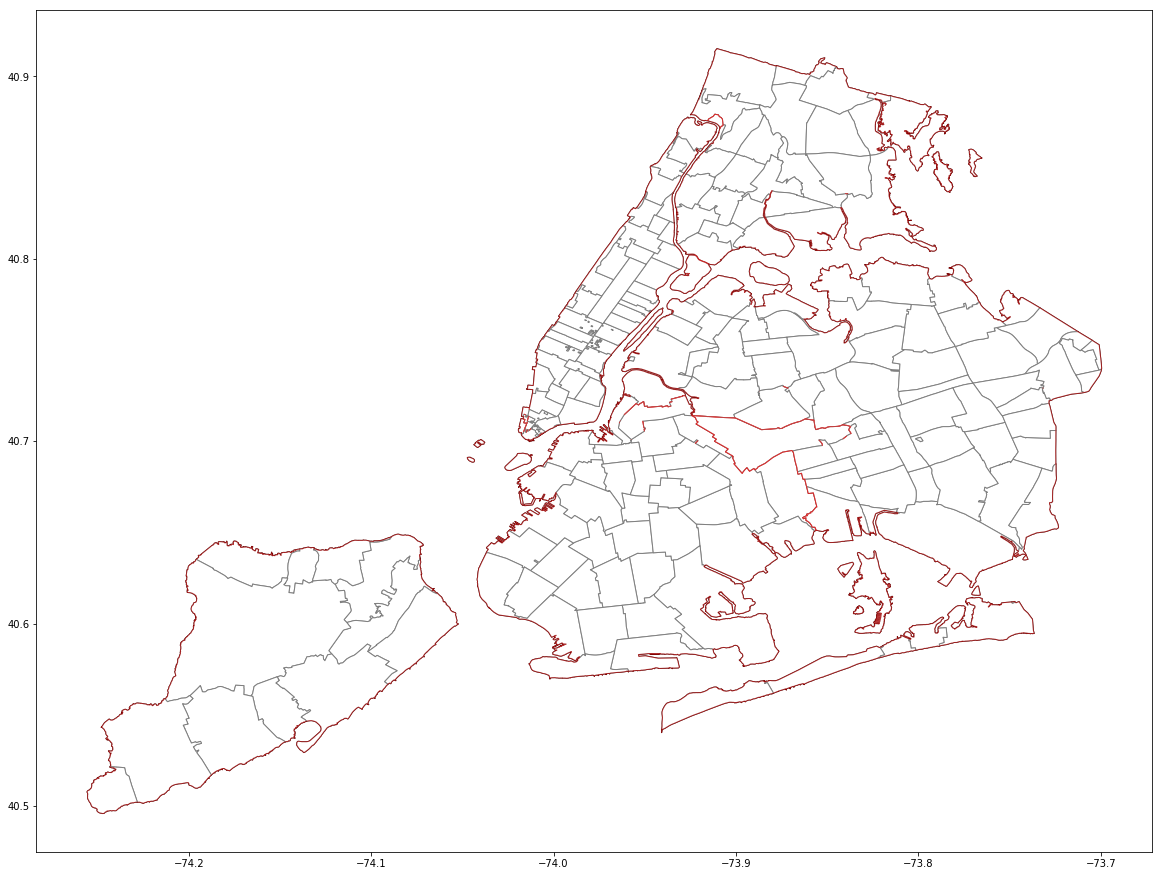

In [8]:
from shapely.ops import cascaded_union
nyc.groupby('COUNTY').apply(lambda x: cascaded_union(x['geometry'].values))
county = gpd.GeoDataFrame(nyc.groupby('COUNTY').apply(lambda x: cascaded_union(x['geometry'].values)).to_frame('geometry'))
ax = county.plot(color='white',edgecolor='black',linewidth=0.5,figsize=(20,20));
ax.set_title('New York City County Boundaries');

fig,ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
nyc.plot(ax=ax, color='white', edgecolor='black')
county.plot(ax=ax, color='white', edgecolor='red', alpha=.5)

In [9]:
ev_stations = gpd.read_file('data2\Ev_stations')
ev_stations.head()

ID            Station_Na                  Street_Add       City  \
0  53447.0           CARCHARGING  851 Avenue of the Americas   New York   
1  74411.0     Quik Park - Tesla               126 W 32nd St   New York   
2  74430.0  GGMC Parking - Tesla               550 W 25th St   New York   
3  80061.0         BEAM CHARGING  776 Avenue of the Americas   New York   
4  89458.0         iPark - Tesla               552 W 30th St  Manhattan   

     ZIP   Latitude  Longitude                   Location  F__of_Leve  \
0  10001  40.747217 -73.989896  (40.7472165, -73.9898959)         0.0   
1  10001  40.748789 -73.989915    (40.748789, -73.989915)         0.0   
2  10001  40.749666 -74.005485    (40.749666, -74.005485)         0.0   
3  10001  40.744914 -73.991028  (40.7449139, -73.9910276)         0.0   
4  10001  40.753049 -74.003333    (40.753049, -74.003333)         0.0   

   F_of_level Super_chag  number_of  Service_ab  \
0         1.0       None        1.0        16.0   
1         2.0       None        2.0        32.0   
2         2.0       None        2.0        32.0   
3         2.0       None        2.0        32.0   
4         2.0       None        2.0        32.0   

                                       geometry  
0  POINT (-73.98989734543912 40.74722476370771)  
1  POINT (-73.98991644554067 40.74879726401495)  
2  POINT (-74.00548645058061 40.74967426364002)  
3  POINT (-73.99102904566188 40.74492216321713)  
4  POINT (-74.00333445009683 40.75305726437791)

In [10]:
len(ev_stations)

362

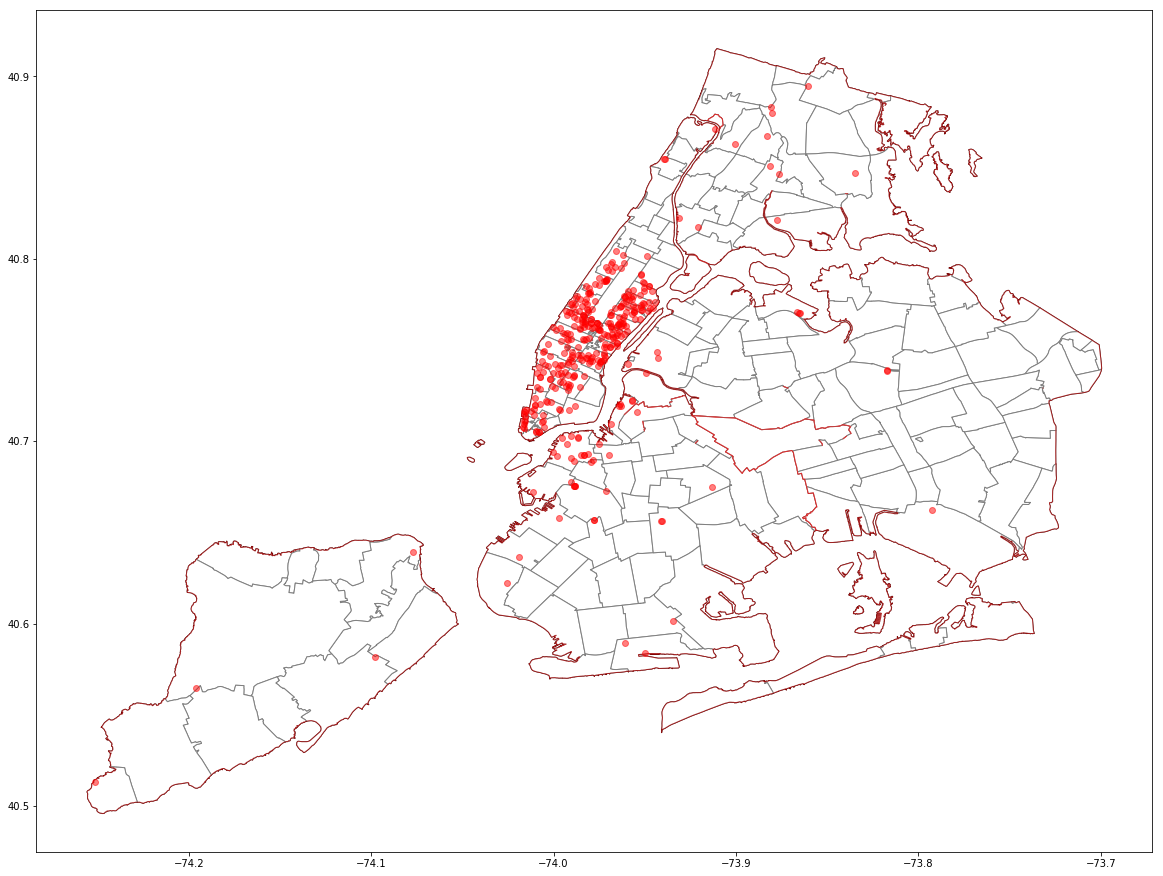

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
nyc.plot(ax=ax, color='white', edgecolor='black')
county.plot(ax=ax, color='white', edgecolor='red', alpha=.5)

ev_stations = gpd.read_file('data2\Ev_stations')
ev_stations.plot(ax=ax,color='red',alpha=.5,figsize=(20,20))

In [12]:
ev_users = gpd.read_file('data2\ev_user')
ev_users.head()
len(ev_users)

6448

In [13]:
evc_users = ev_users.sample(2000)
evc_users.head()

TARGET_FID  CID ZIPCODE   PO_NAME  POPULATION          AREA STATE  \
3800        3800  113   10004  New York      2187.0  7.679616e+06    NY   
5376        5376  169   11423    Hollis     30243.0  4.509503e+07    NY   
5951        5951  201   11373  Elmhurst    101282.0  4.265486e+07    NY   
5746        5746  195   10065  New York     33459.0  1.144258e+07    NY   
1251        1251   60   10023  New York     62800.0  1.521271e+07    NY   

        COUNTY CTY_FIPS                   ev_regis_1  \
3800  New York      061  Consolidated Edison Company   
5376    Queens      081  Consolidated Edison Company   
5951    Queens      081  Consolidated Edison Company   
5746  New York      061  Consolidated Edison Company   
1251  New York      061  Consolidated Edison Company   

                                          geometry  
3800  POINT (-74.02430604986171 40.68530847105398)  
5376    POINT (-73.7741763124133 40.7298247641664)  
5951  POINT (-73.89015670324137 40.74325781975872)  
5746  POINT (-73.95939972930901 40.76607870548882)  
1251  POINT (-73.98507392419647 40.77234991444911)

Text(0.5,1,'EV Users Position')

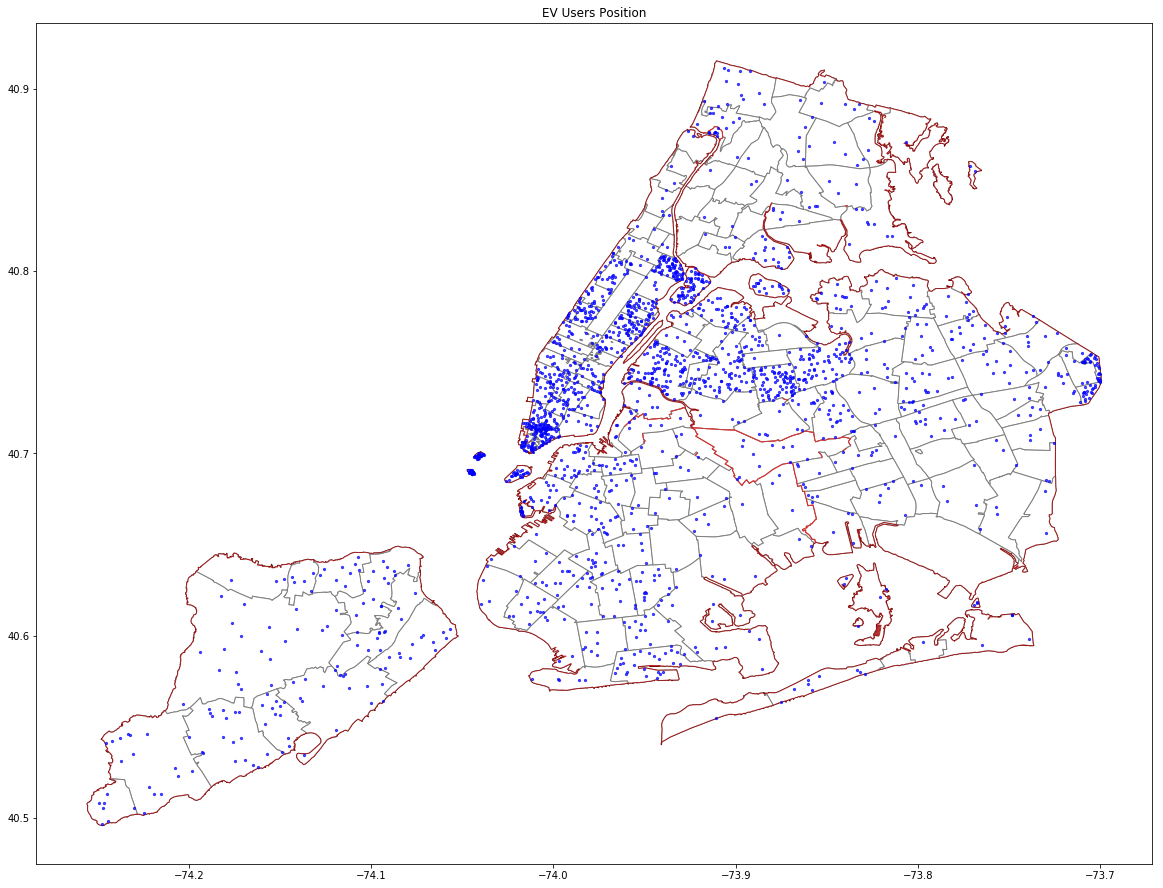

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
nyc.plot(ax=ax, color='white', edgecolor='black')
county.plot(ax=ax, color='white', edgecolor='red', alpha=.5)
evc_users.plot(ax=ax,color='blue',markersize=5,alpha=.7,figsize=(20,20))
ax.set_title('EV Users Position')
#ax.text(260000,'county boundary: Red outline\zipcode boundary: Grey Outline\ev users: Red points');


# Optimization

Assumption:
1.	Each station can only install one specific level of charger, and each charger can only serve one user only.
2.	The user can only go to the assigned station.
3.	Each station would install 2 chargers.

I&i: the set and index of demand point.

J&j: the set and index of charging stations.

m: the level of the station = {1,2,3}.

Fm: the initial install cost of a charger in level m.

Am: the serving ability of a station in level m at candidate point j= the number of serving EV daily.

dij: the distance from the demand point I to the candidate point j.

P: the quantity of station to be constructed.

Xjm = {0,1}: whether j is chosen as a level m station.

Zij = {0,1}: whether user at demand point i receives service at candidate point j.

![title](1.png)

![title](2.png)

In [44]:
from shapely.geometry import Polygon

from gurobipy import *
import random

Take a random subset like 2000 from 'ev_users' as candidate ev charging station

In [16]:
num_potential_locs = 100

candidate_locs = evc_users.iloc[random.sample(range(len(evc_users)),num_potential_locs)]['geometry']
candidate_locs

4052    POINT (-74.01691221537624 40.66592505424558)
3916      POINT (-73.96835927315763 40.679610471895)
2733    POINT (-73.97605634462758 40.73396336777955)
5022    POINT (-73.70126620742067 40.74019731319633)
1900    POINT (-73.89816076601973 40.75549897854949)
4658     POINT (-73.94176103503834 40.5790422604629)
36       POINT (-73.9768957819946 40.64559177610411)
4980     POINT (-74.24400559333324 40.4982599542062)
3613     POINT (-73.9960489131597 40.69612925717735)
149     POINT (-73.95839129690745 40.63082354378089)
3514    POINT (-74.01253831234963 40.70294515374749)
4652    POINT (-73.95588381238014 40.59017172370361)
3982    POINT (-73.80735855091685 40.66636027991797)
3123    POINT (-73.99856483712247 40.71448655958715)
6009     POINT (-73.8774637880074 40.74045742732023)
2052    POINT (-73.89906652696816 40.75106736071781)
4018     POINT (-73.9886836709296 40.66604594361121)
916      POINT (-73.96550899887917 40.8034270782716)
2986    POINT (-73.90206964954038 40.718967198

Build a list of ev candidate charging station locations and of all ev users locations.

In [106]:
# the list of EV candidate Charging Station
candidate_station_locs = [(candidate_locs.values[i].x,candidate_locs.values[i].y) for i in range(num_potential_locs)]
candidate_station_locs

[(-74.01691221537624, 40.665925054245584),
 (-73.96835927315763, 40.679610471895),
 (-73.97605634462758, 40.73396336777955),
 (-73.70126620742067, 40.740197313196326),
 (-73.89816076601973, 40.75549897854949),
 (-73.94176103503834, 40.5790422604629),
 (-73.9768957819946, 40.64559177610411),
 (-74.24400559333324, 40.498259954206205),
 (-73.9960489131597, 40.696129257177354),
 (-73.95839129690745, 40.63082354378089),
 (-74.01253831234963, 40.702945153747486),
 (-73.95588381238014, 40.59017172370361),
 (-73.80735855091685, 40.66636027991797),
 (-73.99856483712247, 40.71448655958715),
 (-73.8774637880074, 40.74045742732023),
 (-73.89906652696816, 40.75106736071781),
 (-73.9886836709296, 40.66604594361121),
 (-73.96550899887917, 40.8034270782716),
 (-73.90206964954038, 40.71896719878988),
 (-74.00700427005835, 40.70952881287727),
 (-73.99699687112717, 40.76249304481195),
 (-73.9566685428676, 40.77160435229502),
 (-73.98505014560949, 40.746797920267895),
 (-73.9381791680471, 40.7650464757438

In [107]:
users_locs = [(evc_users.geometry.values[i].x,evc_users.geometry.values[i].y) for i in range(len(evc_users))]
users_locs

[(-74.0243060498617, 40.68530847105398),
 (-73.7741763124133, 40.7298247641664),
 (-73.89015670324137, 40.743257819758725),
 (-73.95939972930901, 40.76607870548882),
 (-73.98507392419647, 40.77234991444911),
 (-73.9999582460647, 40.738231486847546),
 (-73.9982293440276, 40.74724538699528),
 (-74.00373573033787, 40.71384328439752),
 (-73.75707052062286, 40.670553149773816),
 (-73.9711543131353, 40.76478929021737),
 (-74.00184094449094, 40.742033816720166),
 (-73.94092214892837, 40.79959566346802),
 (-74.00985516166338, 40.70359087777326),
 (-73.99064526249104, 40.748154218404004),
 (-73.82937158429098, 40.57891266587706),
 (-73.99299332154861, 40.72656816052172),
 (-73.94767991611288, 40.775281905949406),
 (-74.01400000812363, 40.70340698129945),
 (-73.98160560834812, 40.69060849390269),
 (-74.0034770574662, 40.6735265268411),
 (-74.01020851228327, 40.71410092860803),
 (-73.958917039652, 40.767618806487405),
 (-73.84517472669674, 40.74351277429166),
 (-73.92465932112326, 40.800177306839

Cherger levels and their corresponding construction investment and service ability(in other word, I need to build a dataframe of var m,Am, and Fm)

In [108]:
level = {'m': [1, 2,3], 'A': [16,32,64],'F':[600,1000,4600]}
level = pd.DataFrame(data=level)
level

m   A     F
0  1  16   600
1  2  32  1000
2  3  64  4600

In [109]:
#service ability(vehiecles per day)
a=([16,32,64])
a

[16, 32, 64]

In [110]:
#construction cost of chager in each level
f=([600,1000,4600])
f

[600, 1000, 4600]

In [111]:
from geopy.distance import great_circle

d = [[great_circle(candidate_station_locs[i], users_locs[j]).km for j in range(len(users_locs))] 
     for i in range(len(candidate_station_locs))]
d

[[1.0139056354081342,
  27.062900697167468,
  14.293603401329685,
  7.094628643184425,
  4.813725450320593,
  2.908656242168497,
  3.2438012948913784,
  2.073879925422591,
  28.893471982902177,
  5.922558329481379,
  2.871191558177994,
  9.392854684635704,
  1.3951089181358787,
  3.8574242815786675,
  21.02501395812944,
  3.244445022338933,
  8.397736890976216,
  1.1925299545915862,
  3.9981562827817525,
  1.5119591478621763,
  1.6529677911279967,
  7.1635083397570485,
  19.245091466168905,
  11.055287916359838,
  2.899422938821753,
  34.675944909300625,
  16.85686451997934,
  8.582510563556562,
  12.796363813030702,
  4.358848011767929,
  13.966249266557329,
  34.363650825618194,
  1.8893052873173903,
  15.122409112177602,
  7.247035510957503,
  15.949427702514702,
  7.350128635784133,
  7.6011318156101115,
  10.554153386670826,
  8.436187291510956,
  2.7117207381075743,
  7.58973613702597,
  13.543748403244782,
  13.469143737595571,
  2.85530242622189,
  16.803751426646162,
  16.1164

In [112]:
d[0]
len(d[0])

2000

Gorubi Optimizer

In [113]:
range(len(users_locs))

range(0, 2000)

In [114]:
range(num_potential_locs)

range(0, 100)

In [117]:
P = 50 # total number of charging stations

model = Model('EVC allocation')
model.setParam('TimeLimit',1000) 

# Decision variables
print('creating vars')
evc_stations = model.addVars(range(num_potential_locs),range(len(a)),name='x',vtype=GRB.BINARY)
users_evc = model.addVars(range(len(users_locs)),range(num_potential_locs), name='z',vtype=GRB.BINARY)

# Constraints
print('creating cons')
#the user in demand point i can only go to one appointed charging station at one time
model.addConstrs((sum([users_evc[i,j] for j in range(num_potential_locs)]) == 1 
                for i in range(len(users_locs))),'premise')

#prerequisite conditions to make a candidate point into function
model.addConstrs(users_evc[i,j] <= evc_stations[j,m] for i in range(len(users_locs)) 
                  for j in range(num_potential_locs) for m in range(len(a)))

the charging demand quatity at one station must not exceed its maximum service ability
model.addConstrs((sum([users_evc[i,j] for i in range(len(users_locs))]) 
                  <= sum([a[m]*evc_stations[j,m] for m in range(len(a))]))
                  for j in range(num_potential_locs))

#a candidate point must be constructed as only one of the levels
#model.addConstrs(sum([evc_stations[j,m] for m in range(len(a))]) <= 1 
                 for j in range(num_potential_locs))

# the constraint of total amount of charging stations to be constrcted
model.addConstr(sum(sum([evc_stations[j,m] for m in range(len(a))]) 
                     for j in range(num_potential_locs))== P)


print('setting obj')
model.setObjective(( sum(sum([f[m]*evc_stations[j,m] for m in range(len(f))]) for j in range(num_potential_locs))
                    +sum(sum([users_evc[i,j]*d[j][i] for i in range(len(users_locs))]) for j in range(num_potential_locs))),GRB.MINIMIZE)

print('solving')
model.optimize()

Changed value of parameter TimeLimit to 1000.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
creating vars
creating cons
setting obj
solving
Optimize a model with 602001 rows, 200300 columns and 1400300 nonzeros
Variable types: 0 continuous, 200300 integer (200300 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-03, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 141390.02480
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve removed 0 rows and 0 columns (presolve time = 10s) ...
Presolve removed 0 rows and 0 columns (presolve time = 15s) ...
Presolve removed 0 rows and 0 columns (presolve time = 20s) ...
Presolve time: 24.91s
Presolved: 602001 rows, 200300 columns, 1400300 nonzeros
Variable types: 0 continuous, 200300 integer (200300 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00  

In [118]:
model.getVars()

[<gurobi.Var x[0,0] (value -0.0)>,
 <gurobi.Var x[0,1] (value 0.0)>,
 <gurobi.Var x[0,2] (value -0.0)>,
 <gurobi.Var x[1,0] (value -0.0)>,
 <gurobi.Var x[1,1] (value 0.0)>,
 <gurobi.Var x[1,2] (value 0.0)>,
 <gurobi.Var x[2,0] (value 1.0)>,
 <gurobi.Var x[2,1] (value 0.0)>,
 <gurobi.Var x[2,2] (value -0.0)>,
 <gurobi.Var x[3,0] (value 1.0)>,
 <gurobi.Var x[3,1] (value 0.0)>,
 <gurobi.Var x[3,2] (value -0.0)>,
 <gurobi.Var x[4,0] (value -0.0)>,
 <gurobi.Var x[4,1] (value 0.0)>,
 <gurobi.Var x[4,2] (value 0.0)>,
 <gurobi.Var x[5,0] (value -0.0)>,
 <gurobi.Var x[5,1] (value -0.0)>,
 <gurobi.Var x[5,2] (value 0.0)>,
 <gurobi.Var x[6,0] (value 0.0)>,
 <gurobi.Var x[6,1] (value 0.0)>,
 <gurobi.Var x[6,2] (value 0.0)>,
 <gurobi.Var x[7,0] (value 1.0)>,
 <gurobi.Var x[7,1] (value 0.0)>,
 <gurobi.Var x[7,2] (value -0.0)>,
 <gurobi.Var x[8,0] (value 1.0)>,
 <gurobi.Var x[8,1] (value 0.0)>,
 <gurobi.Var x[8,2] (value -0.0)>,
 <gurobi.Var x[9,0] (value 1.0)>,
 <gurobi.Var x[9,1] (value 0.0)>,
 <gu

In [166]:
from shapely.geometry import Point
print('Optimal selection')
print('List of selected EV Charging stations')
selected_station_locs = []
J=[]
for v in model.getVars():
    if v.x != 0:
        if v.varName[0] == 'x':
            j = int(v.varName[2:-3])
            m = int(v.varName[-2])
            print(j,m)
            selected_station_locs.append(Point((candidate_station_locs[j][0],candidate_station_locs[j][1]))) 
            J.append(tuple((j,m)))

Optimal selection
List of selected EV Charging stations
2 0
3 0
7 0
8 0
9 0
11 0
12 0
13 0
14 0
15 0
16 0
22 0
23 0
27 0
30 0
31 0
33 0
37 0
38 0
43 0
51 0
51 1
51 2
52 0
53 0
54 0
54 1
54 2
55 0
56 0
59 0
60 0
61 0
64 0
65 0
67 0
68 0
71 0
74 0
75 0
76 0
79 0
82 0
83 0
88 0
89 0
91 0
92 0
97 0
98 0


In [167]:
J

[(2, 0),
 (3, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (22, 0),
 (23, 0),
 (27, 0),
 (30, 0),
 (31, 0),
 (33, 0),
 (37, 0),
 (38, 0),
 (43, 0),
 (51, 0),
 (51, 1),
 (51, 2),
 (52, 0),
 (53, 0),
 (54, 0),
 (54, 1),
 (54, 2),
 (55, 0),
 (56, 0),
 (59, 0),
 (60, 0),
 (61, 0),
 (64, 0),
 (65, 0),
 (67, 0),
 (68, 0),
 (71, 0),
 (74, 0),
 (75, 0),
 (76, 0),
 (79, 0),
 (82, 0),
 (83, 0),
 (88, 0),
 (89, 0),
 (91, 0),
 (92, 0),
 (97, 0),
 (98, 0)]

 Among them, 2 are chose to be constructed as level 2 stations, and 2 stations are level 3, the left will be level 1 charging stations.

In [168]:
J=pd.DataFrame(J)
J

0  1
0    2  0
1    3  0
2    7  0
3    8  0
4    9  0
5   11  0
6   12  0
7   13  0
8   14  0
9   15  0
10  16  0
11  22  0
12  23  0
13  27  0
14  30  0
15  31  0
16  33  0
17  37  0
18  38  0
19  43  0
20  51  0
21  51  1
22  51  2
23  52  0
24  53  0
25  54  0
26  54  1
27  54  2
28  55  0
29  56  0
30  59  0
31  60  0
32  61  0
33  64  0
34  65  0
35  67  0
36  68  0
37  71  0
38  74  0
39  75  0
40  76  0
41  79  0
42  82  0
43  83  0
44  88  0
45  89  0
46  91  0
47  92  0
48  97  0
49  98  0

In [172]:
solution_stations = gpd.GeoDataFrame(selected_station_locs,columns=['geometry'])
solution_stations

geometry
0   POINT (-73.97605634462758 40.73396336777955)
1   POINT (-73.70126620742067 40.74019731319633)
2    POINT (-74.24400559333324 40.4982599542062)
3    POINT (-73.9960489131597 40.69612925717735)
4   POINT (-73.95839129690745 40.63082354378089)
5   POINT (-73.95588381238014 40.59017172370361)
6   POINT (-73.80735855091685 40.66636027991797)
7   POINT (-73.99856483712247 40.71448655958715)
8    POINT (-73.8774637880074 40.74045742732023)
9   POINT (-73.89906652696816 40.75106736071781)
10   POINT (-73.9886836709296 40.66604594361121)
11  POINT (-73.98505014560949 40.74679792026789)
12   POINT (-73.9381791680471 40.76504647574384)
13  POINT (-73.90101729163324 40.75074841217522)
14  POINT (-73.96504519243854 40.69392543769435)
15  POINT (-73.96012954073423 40.76576611116301)
16  POINT (-73.92578161806829 40.73358368215333)
17  POINT (-73.94442284773135 40.66738491252621)
18  POINT (-73.96480932374202 40.81298868448143)
19  POINT (-73.88328845501083 40.74155454293627)
20  POINT (-73.98492617638209 40.73351760029591)
21  POINT (-73.98492617638209 40.73351760029591)
22  POINT (-73.98492617638209 40.73351760029591)
23  POINT (-73.92319090183607 40.75324056650324)
24  POINT (-73.95912395671338 40.78323251197983)
25  POINT (-73.85527600337272 40.75635083606569)
26  POINT (-73.85527600337272 40.75635083606569)
27  POINT (-73.85527600337272 40.75635083606569)
28  POINT (-73.96535758691637 40.66560938524503)
29  POINT (-73.99796023420524 40.62227538697816)
30   POINT (-74.14081052697456 40.6038025739296)
31   POINT (-73.9804542281874 40.78079579730496)
32  POINT (-73.77243885917596 40.77307162860227)
33  POINT (-73.87323857346169 40.74234794668798)
34  POINT (-73.99737002890357 40.61570936914776)
35  POINT (-73.90932889406797 40.73612969471814)
36  POINT (-73.89617750045377 40.89412884825548)
37  POINT (-73.87347651235545 40.73910746022616)
38  POINT (-73.79268762602766 40.70924257138595)
39  POINT (-73.95766878260714 40.72221475169412)
40  POINT (-73.70188342920689 40.74942001075111)
41  POINT (-73.96631580261082 40.77216196096886)
42  POINT (-73.94734740758378 40.77499430662363)
43  POINT (-73.95083576346659 40.78228956946054)
44  POINT (-73.72525683401713 40.70538393744547)
45  POINT (-73.95844167433945 40.74110598196311)
46  POINT (-73.94153094715867 40.80357884266209)
47  POINT (-73.75132224270767 40.77453661053447)
48  POINT (-73.93435318495142 40.79735511806719)
49  POINT (-73.95307106860392 40.76712682398546)

Text(-74.2,40.9,'County: Red outline\\Zipcode Boundary: Grey outline\nRed: Suggested stations\nBlue:users location')

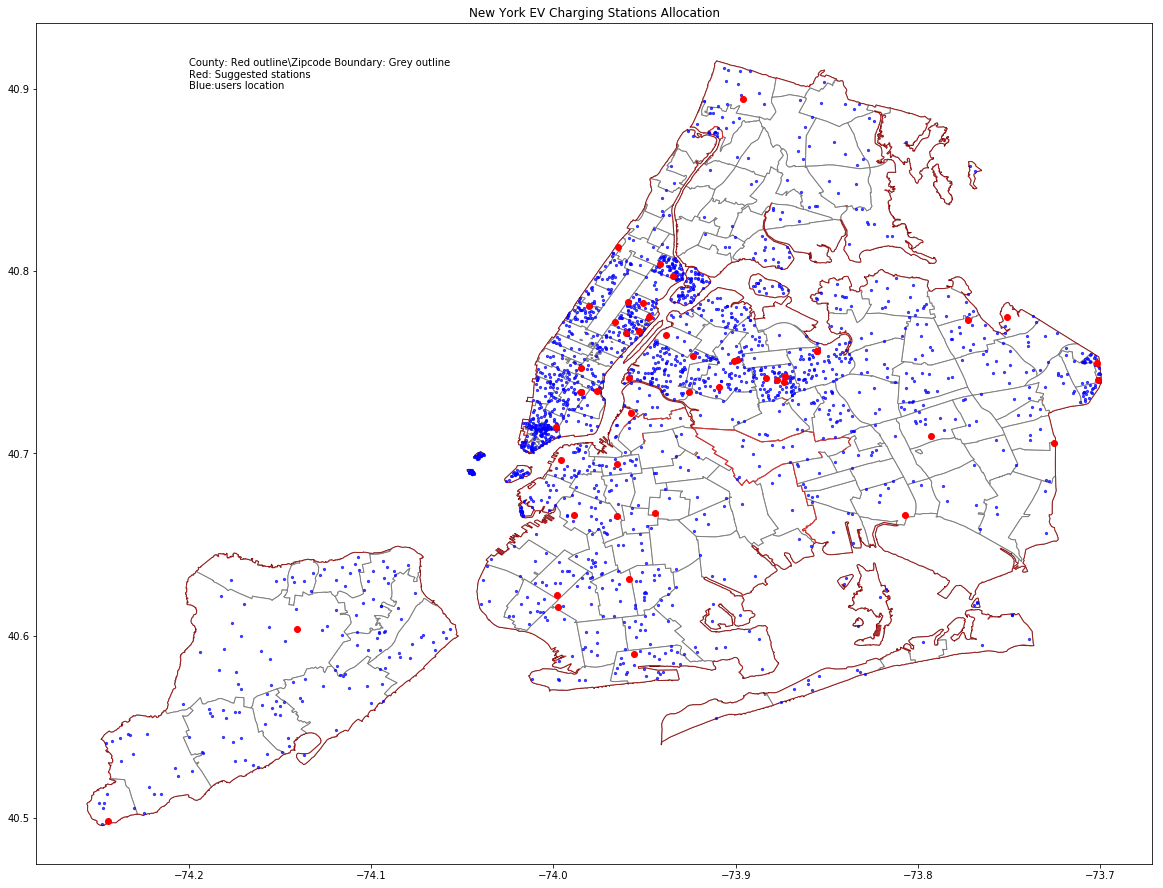

In [200]:
# You've seen before
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
nyc.plot(ax=ax, color='white', edgecolor='black')
county.plot(ax=ax, color='white', edgecolor='red', alpha=.5)
evc_users.plot(ax=ax,color='blue',markersize=5,alpha=.7,figsize=(20,20))
solution_stations.plot(ax=ax,color='red')

# Title and legend
ax.set_title('New York EV Charging Stations Allocation')
ax.text(-74.2,40.9,'County: Red outline\Zipcode Boundary: Grey outline\nRed: Suggested stations\nBlue:users location')